# Can we use a neural network to predict LogS?

Use a neural network - so all neurons in one layer are connected to all other neurons in the next layer.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
train_desc = pd.read_csv("../data/train_desc.csv", index_col=0)
train = pd.read_csv("../data/train_nonull.csv", index_col=0)
train_desc["Y"] = train["Log S"].values

We won't be using cross validation, so we will split our data.

2/3 will become training, and 1/3 will become validation.

In [3]:
train, val = train_test_split(train_desc, test_size=1/3, random_state=1)

tx = train[train.columns[:-1]] #all but the last column
ty = train["Y"] #the last column

vx = val[val.columns[:-1]] #all but the last column
vy = val["Y"] #the last column

print(len(tx))
print(len(vx))

570
285


In [4]:
tx = np.array(tx)
ty = np.array(ty)

vx = np.array(vx)
vy = np.array(vy)

In [5]:
print(tx.shape)

(570, 196)


In [6]:
input_shape = (196,)
epochs = 100

# The neural network model

There are lots of hyperparameters that can have an effect on training performance. Unfortunately, we never know which are the right ones to begin with, so there's often a bit of a search in the space before we settle on the best model.

In [7]:
#parameters to change:
activation = "tanh" #can be 'tanh', 'sigmoid', 'relu'
depth = 5 #how many hidden layers there are, can be any non zero integer
size = 0.5 #for every hidden layer, the number of neurons are multiplied by this factor. 
 #0.5 means a hidden layer is reduced by half. Can be any value between 0 and 2.

In [8]:
### The model. Do not change this code. Any parameters you have changed above will be reflected in here.
model = Sequential() 
model.add(Dense(units=196, activation=activation, input_shape=input_shape, kernel_initializer="normal"))

prev = 196

#For 5 hidden layers, reduce in size by half each layer.
for i in range(0,depth):
    prev *= size
    if prev > 1:
        model.add(Dense(units=int(prev), activation="tanh", kernel_initializer="normal"))
    else:
        next

#output layer - keep this code the same 
model.add(Dense(units=1, activation="linear")) 

#optimisation and compiling:
opt = tf.keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False) #sgd default

model.compile(loss='mean_squared_error', optimizer=opt,
              metrics=['mae'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 196)               38612     
_________________________________________________________________
dense_1 (Dense)              (None, 98)                19306     
_________________________________________________________________
dense_2 (Dense)              (None, 49)                4851      
_________________________________________________________________
dense_3 (Dense)              (None, 24)                1200      
_________________________________________________________________
dense_4 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 78        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 7         
Total para

In [10]:
history = model.fit(tx,ty, validation_data=(vx,vy),
                      epochs=epochs, verbose=1) #set verbose to 0 if you don't want to see lots of output

Train on 570 samples, validate on 285 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
570/570 [==============================] - 1s 2ms/sample - loss: 6.5240 - mean_absolute_error: 1.9403 - val_loss: 4.3817 - val_mean_absolute_error: 1.5337
Epoch 2/100
570/570 [==============================] - 0s 156us/sample - loss: 3.6684 - mean_absolute_error: 1.4858 - val_loss: 3.0258 - val_mean_absolute_error: 1.2814
Epoch 3/100
570/570 [==============================] - 0s 146us/sample - loss: 2.6140 - mean_absolute_error: 1.2343 - val_loss: 2.8969 - val_mean_absolute_error: 1.2687
Epoch 4/100
570/570 [==============================] - 0s 152us/sample - loss: 2.5035 - mean_absolute_error: 1.2076 - val_loss: 2.7540 - val_mean_absolute_error: 1.2562
Epoch 5/100
570/570 [==============================] - 0s 146us/sample - loss: 2.5755 - mean_absolute_error: 1.2266 - val_loss: 2.6422 - val_mean_absolute_error: 1.2002
Epoch 6/100
570/570 [==============================] - 0s 144us

570/570 [==============================] - 0s 140us/sample - loss: 2.4737 - mean_absolute_error: 1.1933 - val_loss: 2.6456 - val_mean_absolute_error: 1.2301
Epoch 47/100
570/570 [==============================] - 0s 150us/sample - loss: 2.5773 - mean_absolute_error: 1.2340 - val_loss: 2.6896 - val_mean_absolute_error: 1.2754
Epoch 48/100
570/570 [==============================] - 0s 160us/sample - loss: 2.3776 - mean_absolute_error: 1.1767 - val_loss: 3.5122 - val_mean_absolute_error: 1.4281
Epoch 49/100
570/570 [==============================] - 0s 149us/sample - loss: 2.5904 - mean_absolute_error: 1.2365 - val_loss: 2.9350 - val_mean_absolute_error: 1.3043
Epoch 50/100
570/570 [==============================] - 0s 156us/sample - loss: 2.5166 - mean_absolute_error: 1.2112 - val_loss: 2.8382 - val_mean_absolute_error: 1.2770
Epoch 51/100
570/570 [==============================] - 0s 148us/sample - loss: 2.6902 - mean_absolute_error: 1.2595 - val_loss: 2.9567 - val_mean_absolute_error: 

570/570 [==============================] - 0s 146us/sample - loss: 2.2399 - mean_absolute_error: 1.1320 - val_loss: 2.5355 - val_mean_absolute_error: 1.1777
Epoch 95/100
570/570 [==============================] - 0s 130us/sample - loss: 2.2071 - mean_absolute_error: 1.1129 - val_loss: 2.3891 - val_mean_absolute_error: 1.1673
Epoch 96/100
570/570 [==============================] - 0s 151us/sample - loss: 2.2086 - mean_absolute_error: 1.1129 - val_loss: 2.4630 - val_mean_absolute_error: 1.1926
Epoch 97/100
570/570 [==============================] - 0s 150us/sample - loss: 2.2612 - mean_absolute_error: 1.1540 - val_loss: 2.5073 - val_mean_absolute_error: 1.1594
Epoch 98/100
570/570 [==============================] - 0s 165us/sample - loss: 2.1262 - mean_absolute_error: 1.0795 - val_loss: 2.3979 - val_mean_absolute_error: 1.1513
Epoch 99/100
570/570 [==============================] - 0s 141us/sample - loss: 2.2687 - mean_absolute_error: 1.1339 - val_loss: 2.6002 - val_mean_absolute_error: 

# Visualise the training

We hope that over a number of epochs, the model is getting better at both the training and validation sets.
This means it is learning!

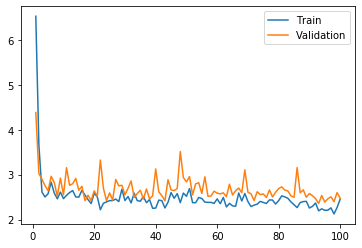

In [11]:
plt.figure()
plt.plot(range(1,epochs+1), history.history["loss"], label="Train")
plt.plot(range(1,epochs+1), history.history["val_loss"], label="Validation")
plt.legend()
plt.show()

# Make some predictions using your trained model

In [12]:
# Making predictions

predictions = model.predict(tx)
val_predictions = model.predict(vx)

In [13]:
from sklearn.metrics import r2_score, mean_squared_error

In [14]:
print("Training:")
print(r2_score(ty, predictions))
print(mean_squared_error(ty, predictions))

Training:
0.48064553611671657
2.246028096696529


In [15]:
print("Validation:")
print(r2_score(vy, val_predictions))
print(mean_squared_error(vy, val_predictions))

Validation:
0.4193864171907459
2.475434352287037


# Optimising a model

Go back to the model and see what effect changing different parameters has on your model? Can you improve performance at all?